<a href="https://colab.research.google.com/github/OpenMindPB/BasicPython/blob/main/Sales_Forcast_simples_abril_14_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# bibliotecas usadas
#import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from google.colab import files

In [2]:
# para gerar o grafico no browser
%matplotlib inline

In [3]:
#clonar do Github
!git clone https://github.com/OpenMindPB/Data
%cd Data

fatal: destination path 'Data' already exists and is not an empty directory.
/content/Data


In [4]:
df = pd.read_excel("Superstore1.xlsx")


In [5]:
df.head() # shows headers with top 5 rows

,Year,Month,Week,Year Sales,Month Sales,Week Sales,Week Quantity,Week Discout count,Sales week Average
0,2014,1,2,157192.8531,25605.2096,7181.310,52,5,652.846364
1,2014,1,3,157192.8531,25605.2096,2523.532,71,7,210.294333
2,2014,1,4,157192.8531,25605.2096,4046.914,64,8,252.932125
3,2014,1,5,157192.8531,25605.2096,9874.666,55,8,658.311067
4,2014,2,6,157192.8531,8899.5830,3745.516,50,5,267.536857


In [6]:
df.tail(3)

,Year,Month,Week,Year Sales,Month Sales,Week Sales,Week Quantity,Week Discout count,Sales week Average
207,2017,12,50,249479.032406,90410.5007,17222.8345,155,18,277.855591
208,2017,12,51,249479.032406,90410.5007,22575.5010,215,30,342.621526
209,2017,12,52,249479.032406,90410.5007,15447.4430,215,33,236.132991


In [7]:

'''
# separa as colunas de interesse (filtrar)
Index=[3,4,5,6,7,8]
Dat_Select=[]
Dat_Select=df.iloc[:,Index].copy()
'''

'\n# separa as colunas de interesse (filtrar)\nIndex=[3,4,5,6,7,8]\nDat_Select=[]\nDat_Select=df.iloc[:,Index].copy()\n'

In [8]:
# funcao normatiza dados
def Normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=(x[i]-a)/b
        #x[i]=0.8*(x[i]-min_x)/(max_x-min_x)+0.1
    return x

In [9]:
# funcao retorna os dados a forma original
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x

In [10]:
DAT =df.copy()
y = DAT['Sales week Average']
y1 = y.shift(1)
y2 = y.shift(2)
y3 = y.shift(3)
DAT.drop('Sales week Average',axis='columns', inplace=True)

In [11]:
DAT['t-1']=y1;DAT['t-2']=y2;DAT['t-3']=y3;DAT['Sales week Average']=y;
DAT.head()

,Year,Month,Week,Year Sales,Month Sales,Week Sales,Week Quantity,Week Discout count,t-1,t-2,t-3,Sales week Average
0,2014,1,2,157192.8531,25605.2096,7181.310,52,5,NaN,NaN,NaN,652.846364
1,2014,1,3,157192.8531,25605.2096,2523.532,71,7,652.846364,NaN,NaN,210.294333
2,2014,1,4,157192.8531,25605.2096,4046.914,64,8,210.294333,652.846364,NaN,252.932125
3,2014,1,5,157192.8531,25605.2096,9874.666,55,8,252.932125,210.294333,652.846364,658.311067
4,2014,2,6,157192.8531,8899.5830,3745.516,50,5,658.311067,252.932125,210.294333,267.536857


In [12]:
DAT = DAT.dropna()

In [13]:
# separa os dados em normatizados e originais
DAT_OLD=[]
DAT_OLD=DAT.copy()
DAT=Normatiza(DAT)

In [14]:
DAT.head()

,Year,Month,Week,Year Sales,Month Sales,Week Sales,Week Quantity,Week Discout count,t-1,t-2,t-3,Sales week Average
3,-1.0,-1.000000,-0.846154,-1.0,-0.590101,-0.320646,-0.684647,-0.647059,-0.390120,-0.535871,0.976928,0.995608
4,-1.0,-0.818182,-0.807692,-1.0,-1.000000,-0.825201,-0.726141,-0.823529,0.995608,-0.390120,-0.535871,-0.340196
5,-1.0,-0.818182,-0.769231,-1.0,-1.000000,-0.947010,-0.950207,-0.882353,-0.340196,0.995608,-0.390120,-0.148249
6,-1.0,-0.818182,-0.730769,-1.0,-1.000000,-1.000000,-0.867220,-0.823529,-0.148249,-0.340196,0.995608,-0.700234
7,-1.0,-0.636364,-0.692308,-1.0,-0.239973,-0.873391,-0.692946,-0.588235,-0.700234,-0.148249,-0.340196,-0.272694


In [15]:
'''
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(DAT)
'''

"\nwith pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also\n    print(DAT)\n"

In [16]:
# separa os dados em treino e teste
#train=DAT.sample(frac=0.8,random_state=None) 
#test=DAT.drop(train.index)
test=DAT[DAT['Year Sales'] == 1]
train=DAT.drop(test.index)

In [17]:
train.tail(15)

,Year,Month,Week,Year Sales,Month Sales,Week Sales,Week Quantity,Week Discout count,t-1,t-2,t-3,Sales week Average
143,0.333333,0.454545,0.500000,-0.096103,0.679598,-0.298609,-0.261411,0.176471,0.416869,0.144301,-0.432470,-0.099059
144,0.333333,0.636364,0.538462,-0.096103,-0.330056,-0.767504,-0.435685,-0.235294,-0.099059,0.416869,0.144301,-0.494764
145,0.333333,0.636364,0.576923,-0.096103,-0.330056,-0.149011,-0.253112,-0.058824,-0.494764,-0.099059,0.416869,0.259425
146,0.333333,0.636364,0.615385,-0.096103,-0.330056,-0.517908,-0.253112,-0.117647,0.259425,-0.494764,-0.099059,-0.373220
147,0.333333,0.636364,0.653846,-0.096103,-0.330056,-0.452417,-0.112033,-0.235294,-0.373220,0.259425,-0.494764,-0.244613
148,0.333333,0.636364,0.692308,-0.096103,-0.330056,0.533616,0.477178,0.588235,-0.244613,-0.373220,0.259425,0.283675
149,0.333333,0.818182,0.730769,-0.096103,0.848335,0.974908,0.676349,0.941176,0.283675,-0.244613,-0.373220,0.204483
150,0.333333,0.818182,0.769231,-0.096103,0.848335,0.373637,0.327801,0.470588,0.204483,0.283675,-0.244613,-0.027571
151,0.333333,0.818182,0.807692,-0.096103,0.848335,0.362421,0.618257,1.000000,-0.027571,0.204483,0.283675,-0.082667
152,0.333333,0.818182,0.846154,-0.096103,0.848335,0.819909,1.000000,0.941176,-0.082667,-0.027571,0.204483,0.032833


In [18]:
print(test.shape)
print(train.shape)

(52, 12)
(155, 12)


In [19]:
#test.head()
test

,Year,Month,Week,Year Sales,Month Sales,Week Sales,Week Quantity,Week Discout count,t-1,t-2,t-3,Sales week Average
158,1.0,-1.000000,-1.000000,1.0,-0.590101,-0.970639,-1.000000,-1.000000,0.452711,-0.198635,0.258426,0.036668
159,1.0,-1.000000,-0.961538,1.0,-0.590101,-0.542364,-0.709544,-0.823529,0.036668,0.452711,-0.198635,-0.261221
160,1.0,-1.000000,-0.923077,1.0,-0.590101,-0.925795,-0.551867,-0.705882,-0.261221,0.036668,0.452711,-0.306223
161,1.0,-1.000000,-0.884615,1.0,-0.590101,-0.800390,-0.609959,-0.647059,-0.306223,-0.261221,0.036668,-0.899861
162,1.0,-1.000000,-0.846154,1.0,-0.590101,-0.320646,-0.684647,-0.647059,-0.899861,-0.306223,-0.261221,-0.836912
163,1.0,-0.818182,-0.807692,1.0,-1.000000,-0.825201,-0.726141,-0.823529,-0.836912,-0.899861,-0.306223,-0.307093
164,1.0,-0.818182,-0.769231,1.0,-1.000000,-0.947010,-0.950207,-0.882353,-0.307093,-0.836912,-0.899861,-0.113279
165,1.0,-0.818182,-0.730769,1.0,-1.000000,-1.000000,-0.867220,-0.823529,-0.113279,-0.307093,-0.836912,-0.712798
166,1.0,-0.818182,-0.692308,1.0,-1.000000,-0.873391,-0.692946,-0.588235,-0.712798,-0.113279,-0.307093,-0.141008
167,1.0,-0.636364,-0.653846,1.0,-0.239973,-0.546935,-0.576763,-0.294118,-0.141008,-0.712798,-0.113279,-0.549736


In [20]:
'''
total_rows = test.count
print(total_rows)
'''

'\ntotal_rows = test.count\nprint(total_rows)\n'

In [21]:
# obtem as variaveis independentes (treino e teste)
x_train=train.iloc[:,[3,4,5,6,7,8,9,10]]
x_test=test.iloc[:,[3,4,5,6,7,8,9,10]]
X_OLD=DAT_OLD.iloc[:,[3,4,5,6,7,8,9,10]]

In [22]:
x_train.columns

Index(['Year Sales', 'Month Sales', 'Week Sales', 'Week Quantity ',
       'Week Discout count', 't-1', 't-2', 't-3'],
      dtype='object')

In [23]:
Select=['Year Sales', 'Month Sales', 'Week Sales', 'Week Quantity ',
        'Week Discout count', 't-1', 't-2', 't-3']
Select=['Year Sales', 'Month Sales', 'Week Sales',  't-1', 't-2', 't-3']

In [24]:
x_train = x_train[Select]
x_test = x_test[Select]
X_OLD = X_OLD[Select]

In [25]:
x_train.head()

,Year Sales,Month Sales,Week Sales,t-1,t-2,t-3
3,-1.0,-0.590101,-0.320646,-0.390120,-0.535871,0.976928
4,-1.0,-1.000000,-0.825201,0.995608,-0.390120,-0.535871
5,-1.0,-1.000000,-0.947010,-0.340196,0.995608,-0.390120
6,-1.0,-1.000000,-1.000000,-0.148249,-0.340196,0.995608
7,-1.0,-0.239973,-0.873391,-0.700234,-0.148249,-0.340196


In [26]:
# obtem a dependente potência (treino e teste)
Index=[11]
y_train=train.iloc[:,Index]
y_test=test.iloc[:,Index]
Y_OLD=DAT_OLD.iloc[:,Index]

In [27]:
# define a rede neural 
model = MLPRegressor(solver='adam',activation='tanh',max_iter=1500,
                     alpha=1e-5,hidden_layer_sizes=(6),random_state=1)

In [28]:
# treina a rede neural
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=6, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1500,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [29]:
# usa a rede neural treina em calculos para treino e teste
y_calc_train=model.predict(x_train)
y_calc_test=model.predict(x_test)

In [30]:
# transforma a saida da rede em dataframe 
y_calc_train=pd.DataFrame(y_calc_train)
y_calc_test=pd.DataFrame(y_calc_test)
col_names=list(y_train)
y_calc_train.columns = col_names
y_calc_test.columns = col_names

In [31]:
# transforma dos dados calculados na forma original (nao normatizado)
y_calc_train=Original(y_calc_train,Y_OLD)
y_calc_test=Original(y_calc_test,Y_OLD)

In [32]:
# recupera os dados originais 
test=[]
train=[]
train=Original(y_train,Y_OLD)
test=Original(y_test,Y_OLD)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [33]:
train

,Sales week Average
3,658.311067
4,267.536857
5,323.688857
6,162.211900
7,287.283727
...,...
153,376.662143
154,441.611141
155,442.656882
156,308.948860


In [34]:
# escolhe uma das resposta para fazer o grafico (resistencia-treino)
resist_obs_train=[]
resist_calc_train=[]
resist_calc_train=y_calc_train.copy()
resist_obs_train=train.copy()

In [35]:
# escolhe uma das resposta para fazer o grafico (resistencia-teste)
resist_obs_test=[]
resist_calc_test=[]
resist_calc_test=y_calc_test.copy()
resist_obs_test=test.copy()

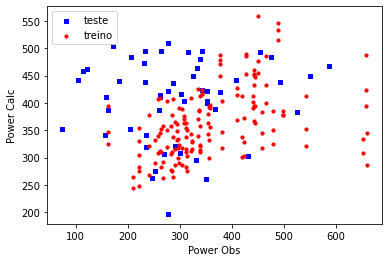

In [36]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(resist_obs_test,resist_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(resist_obs_train,resist_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('Power Calc')
plt.xlabel('Power Obs')
plt.show()

In [37]:
mse=mean_squared_error(resist_obs_test,resist_calc_test)
print("MSE teste=",mse)
R2=r2_score(resist_obs_test,resist_calc_test)
print("R^2 teste=",R2)

MSE teste= 28465.891770295293
R^2 teste= -1.2983787611822222


In [38]:
mse=mean_squared_error(resist_obs_train,resist_calc_train)
print("MSE treino=",mse)
R2=r2_score(resist_obs_train,resist_calc_train)
print("R^2 treino=",R2)

MSE treino= 9272.603802059333
R^2 treino= 0.16250789232659657
